# Problem 1

Find the expected number of trials to see all n numbers in an n-sided dice.

## Solution:

Let X be the number of trials to see all n numbers in an n-sided dice. Also, for all $i\in \{1,2,3,...,n\}$ let $U_i$ be the number of trials to see i distinct numbers given we have already seen i-1 distinct numbers. Then 

$$
X = \sum_{i=1}^{n} U_i
$$

Note that each roll is independent of the previous rolls so $U_i$ follows a geometric distribution with probability of unseen values given seen values $p = \frac{n-i+1}{n}$. Hence 

$$
E[X] = \sum_{i=1}^n E[U_i] = \sum_{i=1}^{n} E[U_i] = \sum_{i=1}^{n} \frac{n}{n-i+1}
$$

For example if $n=6$ we get the expected number of rolls to be 14.7.




# Problem 2

Also, code a simulation for a large number of trials with n-sided dice and match it with probabilistic calculations from the previous deduction of the expected number of trials to see all n numbers in an n-sided dice

## Solution: Simulation

In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def get_number_of_trials(n):
    total_trials = sum([n/(n-i+1) for i in range(1,n+1)])
    return total_trials

def sim_and_check(n):
    # n is the number of sides in a die
    data = []
    # number of trials based on the expected number of trials to see
    # all n sides
    m = math.ceil(get_number_of_trials(n))
    for _ in range(m):
        roll = random.randint(1, n)
        data.append(roll)

    is_all = set(data) == set([i+1 for i in range(n)])
    return [m, is_all]

## For n = 6, 30, and 100 sided dice
We will create 10000 experiments of rolling a n sided dice an appropriate number times using the formula:
$$
\text{number of trials} = E[X] = \sum_{i=1}^{n} \frac{n}{n-i+1}
$$

In [2]:
n_sides = [6, 30, 100]
number_of_trials = {}
dfs = {}
# record all the yes and nn
for n in n_sides:
    m =  sim_and_check(n)[0]
    number_of_trials[n] = m
    data = []
    # will run m trials 10000 times to see 
    # how many yes and no's we can get
    for i in range(10000):
        is_all =  'Yes' if sim_and_check(n)[1] else 'No'
        d = {'number of sides': n, 'is all': is_all}
        data.append(d)

    # create a dataset of 10000 records for each m trials
    temp = pd.DataFrame(data)
    print('finished 10000 experiments for side', n)
    dfs[n] = temp

finished 10000 experiments for side 6
finished 10000 experiments for side 30
finished 10000 experiments for side 100


In [3]:
number_of_trials

{6: 15, 30: 120, 100: 519}

In [4]:
dfs[6].head()

,number of sides,is all
0,6,Yes
1,6,Yes
2,6,No
3,6,Yes
4,6,No


In [5]:
dfs[30].head()

,number of sides,is all
0,30,No
1,30,No
2,30,Yes
3,30,Yes
4,30,Yes


<AxesSubplot:title={'center':'Value Count After 10000 Experiments of 519 trials of a 100 side dice'}>

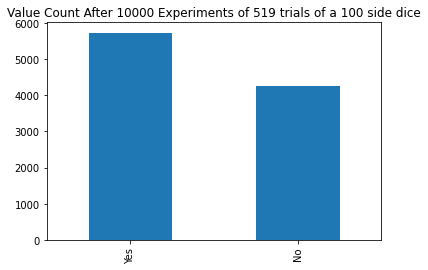

In [6]:
dfs[100]['is all'].value_counts().plot(kind='bar', 
                                       title='Value Count After 10000 Experiments of '+str(number_of_trials[100]) +' trials of a 100 side dice')

In [7]:
value_counts_n_sides = {}
for n in n_sides:
    value_counts_n_sides[n] = pd.DataFrame(dfs[n]['is all'].value_counts())

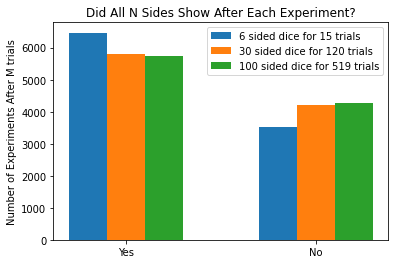

In [13]:
X = ['Yes','No']
ticks = -.2
for n in n_sides:
    Y_vals = value_counts_n_sides[n]['is all'].to_list()
    X_axis = np.arange(len(X))
    delta = .2
    plt.bar(X_axis + ticks, Y_vals, delta, label = str(n)+' sided dice for '+str(number_of_trials[n])+' trials')
    ticks += delta

plt.xticks(X_axis, X)
plt.title("Did All N Sides Show After Each Experiment?")
plt.ylabel("Number of Experiments After M trials")
plt.legend()
plt.show()

# Conclusion

For 6, 30, and 100 sided dice all sides show up in more experiments than not. We can see that for each dice experiment we are more likely to see all sides afer the appropriate number of trials given by the formula 
$$
\text{number of trials} = E[X] = \sum_{i=1}^{n} \frac{n}{n-i+1}
$$